#### 데이터 측정

1. 행의 식별
2. 데이터셋 행과 열의 구조
3. 누락값

#### index

In [2]:
import pandas as pd
import numpy as np
nls97 = pd.read_csv("data/nls97.csv")
covidtotals = pd.read_csv("data/covidtotals.csv", parse_dates=['lastdate'])

In [ ]:
nls97.set_index("personid",inplace=True)
nls97.index

In [ ]:
nls97.shape

(8984, 88)

In [ ]:
nls97.index.nunique()

8984

In [9]:
nls97.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8984 entries, 100061 to 999963
Data columns (total 88 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 8984 non-null   object 
 1   birthmonth             8984 non-null   int64  
 2   birthyear              8984 non-null   int64  
 3   highestgradecompleted  6663 non-null   float64
 4   maritalstatus          6672 non-null   object 
 5   childathome            4791 non-null   float64
 6   childnotathome         4791 non-null   float64
 7   wageincome             5091 non-null   float64
 8   weeklyhrscomputer      5792 non-null   object 
 9   weeklyhrstv            6711 non-null   object 
 10  nightlyhrssleep        6706 non-null   float64
 11  satverbal              1406 non-null   float64
 12  satmath                1407 non-null   float64
 13  gpaoverall             6004 non-null   float64
 14  gpaenglish             5798 non-null   float64
 15  gp

In [ ]:
nls97.head(2)

In [11]:
nls97.head(2).T

personid,100061,100139
gender,Female,Male
birthmonth,5,9
birthyear,1980,1983
highestgradecompleted,13.0,12.0
maritalstatus,Married,Married
...,...,...
colenroct15,1. Not enrolled,1. Not enrolled
colenrfeb16,1. Not enrolled,1. Not enrolled
colenroct16,1. Not enrolled,1. Not enrolled
colenrfeb17,1. Not enrolled,1. Not enrolled


In [12]:
covidtotals.set_index("iso_code",inplace=True)
print(covidtotals.index.nunique())
print(covidtotals.shape)

210
(210, 11)


In [ ]:
covidtotals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, AFG to ZWE
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   lastdate         210 non-null    datetime64[ns]
 1   location         210 non-null    object        
 2   total_cases      210 non-null    int64         
 3   total_deaths     210 non-null    int64         
 4   total_cases_pm   209 non-null    float64       
 5   total_deaths_pm  209 non-null    float64       
 6   population       210 non-null    float64       
 7   pop_density      198 non-null    float64       
 8   median_age       186 non-null    float64       
 9   gdp_per_capita   182 non-null    float64       
 10  hosp_beds        164 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 27.8+ KB


#### columns

In [36]:
nls97 = pd.read_csv("data/nls97.csv")
# covidtotals = pd.read_csv("data/covidtotals.csv", parse_dates=['lastdate'])

In [43]:
# nls97.set_index("personid", inplace=True)
# 적용 안됨 !
nls97.loc[:, nls97.dtypes == 'object'] = \
  nls97.select_dtypes(['object']). \
  apply(lambda x: x.astype('category'))

In [47]:
nls97.loc[:, nls97.dtypes.isin(['object', 'string'])] = (
    nls97.select_dtypes(['object', 'string']).apply(lambda x: x.astype('category'))
)

In [49]:
print(nls97.dtypes)

personid                   int64
gender                    object
birthmonth                 int64
birthyear                  int64
highestgradecompleted    float64
                          ...   
colenroct15               object
colenrfeb16               object
colenroct16               object
colenrfeb17               object
colenroct17               object
Length: 89, dtype: object


In [ ]:
nls97['gender'] #Series
nls97[['gender']] #dataframes

personid
100061    Female
100139      Male
100284      Male
100292      Male
100583      Male
           ...  
999291    Female
999406      Male
999543    Female
999698    Female
999963    Female
Name: gender, Length: 8984, dtype: object

In [ ]:
nls97.loc[:,'gender'] #series
nls97.iloc[:,[0]] #dataframes

personid
100061    Female
100139      Male
100284      Male
100292      Male
100583      Male
           ...  
999291    Female
999406      Male
999543    Female
999698    Female
999963    Female
Name: gender, Length: 8984, dtype: object

In [ ]:
nls97.filter(like="weeksworked")

,weeksworked00,weeksworked01,weeksworked02,weeksworked03,weeksworked04,weeksworked05,weeksworked06,weeksworked07,weeksworked08,weeksworked09,weeksworked10,weeksworked11,weeksworked12,weeksworked13,weeksworked14,weeksworked15,weeksworked16,weeksworked17
personid,,,,,,,,,,,,,,,,,,
100061,46.0,52.0,52.0,48.0,52.0,53.0,52.0,52.0,39.0,40.0,52.0,53.0,40.0,52.0,52.0,52.0,48.0,48.0
100139,5.0,49.0,52.0,52.0,52.0,53.0,52.0,52.0,52.0,52.0,52.0,53.0,52.0,52.0,52.0,52.0,53.0,52.0
100284,5.0,8.0,52.0,35.0,40.0,41.0,52.0,52.0,52.0,18.0,14.0,0.0,0.0,NaN,11.0,52.0,47.0,0.0
100292,29.0,34.0,52.0,31.0,52.0,53.0,52.0,52.0,52.0,52.0,14.0,52.0,52.0,52.0,52.0,52.0,4.0,NaN
100583,53.0,52.0,52.0,52.0,48.0,53.0,52.0,52.0,52.0,52.0,52.0,53.0,52.0,27.0,3.0,52.0,53.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999291,27.0,52.0,52.0,33.0,15.0,21.0,52.0,52.0,52.0,52.0,52.0,53.0,52.0,52.0,52.0,52.0,53.0,52.0
999406,51.0,52.0,44.0,45.0,52.0,53.0,52.0,25.0,52.0,52.0,52.0,53.0,52.0,52.0,52.0,52.0,53.0,52.0
999543,0.0,0.0,20.0,23.0,8.0,8.0,17.0,0.0,36.0,52.0,52.0,53.0,52.0,32.0,47.0,48.0,0.0,30.0


### row

In [2]:
import pandas as pd
import numpy as np

In [25]:
nls97 = pd.read_csv("data/nls97.csv")

In [26]:
nls97.set_index('personid',inplace=True)

In [7]:
nls97[1000:1004:2].T

personid,195884,195970
gender,Male,Female
birthmonth,12,3
birthyear,1981,1982
highestgradecompleted,NaN,17.0
maritalstatus,NaN,Never-married
...,...,...
colenroct15,NaN,1. Not enrolled
colenrfeb16,NaN,1. Not enrolled
colenroct16,NaN,1. Not enrolled
colenrfeb17,NaN,1. Not enrolled


In [8]:
nls97.nightlyhrssleep.quantile(0.05)

np.float64(4.0)

In [15]:
sleepcheckbool = nls97.nightlyhrssleep <= 4
lowsleep = nls97.loc[sleepcheckbool]
lowsleep.shape

(364, 88)

In [16]:
lowsleep2 = nls97[nls97["nightlyhrssleep"] <= 4]
lowsleep2.shape

(364, 88)

In [17]:
lowsleep.childathome.describe()

count    293.000000
mean       1.788396
std        1.400685
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: childathome, dtype: float64

In [23]:
lowsleep3pluschildren = nls97.loc[(nls97.nightlyhrssleep<=4)&(nls97.childathome>=3),['nightlyhrssleep','childathome']]
lowsleep3pluschildren

,nightlyhrssleep,childathome
personid,,
119754,4.0,4.0
141531,4.0,5.0
152706,4.0,4.0
156823,1.0,3.0
158355,4.0,4.0
...,...,...
905774,4.0,3.0
907315,4.0,3.0
955166,3.0,3.0


### 범주형변수

In [ ]:
nls97[nls97.select_dtypes('object').columns] = nls97.select_dtypes('object').apply(lambda x: x.astype('category'))

In [40]:
catcols = nls97.select_dtypes(include=['category']).columns

In [41]:
nls97[catcols].isnull().sum()

gender                      0
maritalstatus            2312
weeklyhrscomputer        3192
weeklyhrstv              2273
highestdegree              31
govprovidejobs           7151
govpricecontrols         7125
govhealthcare            7110
govelderliving           7112
govindhelp               7169
govunemp                 7173
govincomediff            7209
govcollegefinance        7109
govdecenthousing         7137
govprotectenvironment    7124
colenrfeb97              7734
colenroct97               483
colenrfeb98               483
colenroct98                96
colenrfeb99               119
colenroct99               133
colenrfeb00               164
colenroct00               179
colenrfeb01               198
colenroct01               226
colenrfeb02               252
colenroct02               286
colenrfeb03               326
colenroct03               362
colenrfeb04               406
colenroct04               438
colenrfeb05               476
colenroct05               513
colenrfeb0

In [44]:
nls97.maritalstatus.value_counts(sort=False, normalize=True)

maritalstatus
Divorced         0.099371
Married          0.459532
Never-married    0.414568
Separated        0.023082
Widowed          0.003447
Name: proportion, dtype: float64

In [50]:
nls97.filter(like="gov").apply(lambda x: x.value_counts(normalize=True) )

,govprovidejobs,govpricecontrols,govhealthcare,govelderliving,govindhelp,govunemp,govincomediff,govcollegefinance,govdecenthousing,govprotectenvironment
1. Definitely,0.247681,0.541689,0.665422,0.700321,0.428650,0.218112,0.324507,0.734400,0.442339,0.668817
2. Probably,0.336607,0.334051,0.271078,0.247863,0.411019,0.403092,0.284507,0.230400,0.433676,0.286559
3. Probably not,0.252046,0.086606,0.045358,0.037927,0.119008,0.262838,0.228732,0.026667,0.100162,0.029570
4. Definitely not,0.163666,0.037655,0.018143,0.013889,0.041322,0.115958,0.162254,0.008533,0.023822,0.015054


In [52]:
nls97[nls97.maritalstatus =="Married"].filter(like="gov").apply(lambda x: x.value_counts(normalize = True))

,govprovidejobs,govpricecontrols,govhealthcare,govelderliving,govindhelp,govunemp,govincomediff,govcollegefinance,govdecenthousing,govprotectenvironment
1. Definitely,0.173315,0.459864,0.564450,0.632293,0.372549,0.147265,0.258890,0.695418,0.356354,0.644505
2. Probably,0.328748,0.380952,0.359566,0.310719,0.445378,0.395512,0.273115,0.261456,0.493094,0.313433
3. Probably not,0.314993,0.112925,0.051560,0.037992,0.142857,0.328191,0.284495,0.033693,0.120166,0.028494
4. Definitely not,0.182944,0.046259,0.024423,0.018996,0.039216,0.129032,0.183499,0.009434,0.030387,0.013569


### 연속형 변수

In [55]:
import matplotlib.pyplot as plt

In [56]:
c = pd.read_csv('data/covidtotals.csv', parse_dates=['lastdate'])
c.set_index('iso_code',inplace=True)
c.sample(2, random_state=2).T

iso_code,COG,VIR
lastdate,2020-06-01 00:00:00,2020-06-01 00:00:00
location,Congo,United States Virgin Islands
total_cases,611,69
total_deaths,20,6
total_cases_pm,110.727,660.774
total_deaths_pm,3.624,57.459
population,5518092.0,104423.0
pop_density,15.405,306.48
median_age,19.0,42.2
gdp_per_capita,4881.406,NaN


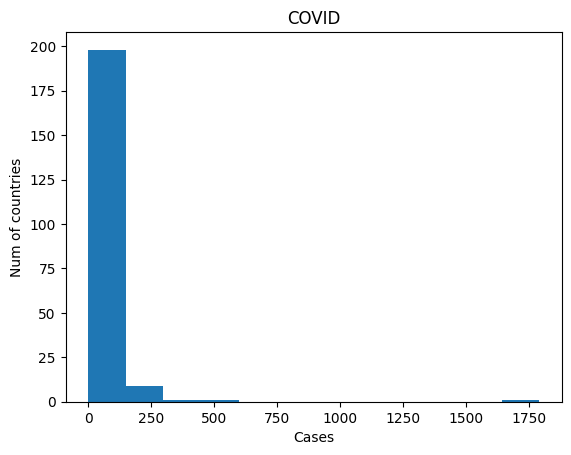

In [62]:
totvars = [ 'total_cases','total_deaths','population','hosp_beds']
c[totvars].quantile(np.arange(0.0 ,1.1, 0.1))

plt.hist(c['total_cases']/1000, bins=12)
plt.title("COVID")
plt.xlabel("Cases")
plt.ylabel("Num of countries")
plt.show()